In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad, quadrature
from numpy import sqrt, sin, cos, pi

In [2]:
def optionpriceNIG(R, alpha, beta, delta, mns, r, T):
    S0 = 1
    q = 0
    def chi(R,u,alpha,beta,delta,T):
        kap  = delta*(np.sqrt(alpha**2-beta**2)- np.sqrt(alpha**2-(beta+complex(R,u))**2))
        kap1 = delta*(np.sqrt(alpha**2-beta**2)- np.sqrt(alpha**2-(beta+1)**2)) 
        ##########
        chi = np.exp((kap+ complex(R,u)*(r-q-kap1))*T)
        return(chi)
    
    
    def fun(u):
        fun = (1/mns)**complex(-R, u)/(complex(-R, u) *complex(1-R,u))*chi(R, -u,alpha,beta,delta, T)
        return(fun)
    
    
    
    NumInt = quad(lambda u: fun(u), -np.inf, np.inf)[0]
    C      = ((0.5* np.exp(-r*T)*(S0/mns))/np.pi) * NumInt 
    return(C)   

In [3]:
alpha = 6.20
beta = -3.80 
R = 2
delta = .15
r = 0
q = 0
T = np.array([1/12,2/12,0.25,0.50,0.75])
mns = np.array([20/17,10/9,100/92.5,100/95.0,100/97.5,1,100/102.5,100/105.0,100/107.5,100/110.0,100/115.0])
price = np.zeros((len(T), len(mns)))
for i in range(len(T)):
    for j in range(len(mns)):
        price[i,j] = optionpriceNIG(R, alpha, beta, delta, mns[j], r, T[i])
price = pd.DataFrame(price) 
price


C:\anaconda\envs\virtualenv\lib\site-packages\scipy\integrate\quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


,0,1,2,3,4,5,6,7,8,9,10
0,0.152206,0.103454,0.079424,0.055840,0.033172,0.013384,0.004293,0.002097,0.001227,0.000781,0.000365
1,0.154439,0.106864,0.083699,0.061276,0.040190,0.021983,0.010175,0.005156,0.002998,0.001896,0.000875
2,0.156685,0.110207,0.087802,0.066325,0.046354,0.029030,0.016281,0.009014,0.005345,0.003390,0.001560
3,0.163392,0.119733,0.099097,0.079597,0.061619,0.045676,0.032360,0.022112,0.014876,0.010063,0.004863
4,0.169931,0.128492,0.109094,0.090839,0.073974,0.058775,0.045518,0.034414,0.025527,0.018717,0.010021


In [4]:
import random

In [5]:
from pyDOE import *
import random
from scipy.stats.distributions import uniform
### parameters : R, $alpha, beta, $delta, $mns, $r, $T  ###

xlimits = np.array([[2, 10-2], [0.0, 1-0.0], [0.4, 1.6],[0.02, 0.1-0.02], [0.2, 1.1-0.2]])
################################################################################
num = 11500
X = np.zeros((num,7))
y = np.zeros(num)

X[:,0] = 2* np.ones((num,))   # R variable

np.random.seed(5)
x = lhs(5, samples = num)

#### SCALING-FITTING THE DESIRED RANGE ####

for i in range(5):
    x[:,i] = uniform(loc=xlimits[i][0], scale=xlimits[i][1]).ppf(x[:,i])

    
X[:,1] = x[:,0]                                    # alpha 
X[:,3] = x[:,1]                                    # delta
X[:,4] = x[:,2]                                    # mns
X[:,5] = x[:,3]                                    # r
X[:,6] = x[:,4]                                    #T



for i in range(num):
    X[i,2] = random.uniform(-x[i,0]+ 0.1, x[i,0] - 0.1)       #beta
    X[i,0] = random.uniform(1, min(4, X[i,1]-X[i,2]))         #R

   

In [6]:
df = pd.DataFrame(X, columns = ("R", "alpha", "beta", "delta", "mns", "r", "T"))
#df = df[df["R"]<=5]
df.head(5)


,R,alpha,beta,delta,mns,r,T
0,1.462202,5.288775,-2.281347,0.850292,1.994461,0.085815,0.781747
1,1.731970,6.568678,-3.272271,0.165679,1.294918,0.055616,0.344312
2,0.366584,3.852632,3.565927,0.585253,0.545595,0.092790,0.437959
3,1.865313,2.776264,-0.418825,0.385974,0.788269,0.092009,0.354460
4,2.574610,8.557470,-2.779560,0.292012,1.226481,0.092055,1.092588


In [7]:
 # outputs
R     = X[:,0]
alpha = X[:,1]
beta  = X[:,2]
delta = X[:,3]
mns   = X[:,4]
r     = X[:,5]
T     = X[:,6]


for i in range(num):
    y[i]   =   optionpriceNIG(R[i], alpha[i], beta[i], delta[i],mns[i], r[i], T[i])

C:\anaconda\envs\virtualenv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\anaconda\envs\virtualenv\lib\site-packages\ipykernel_launcher.py:18: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\anaconda\envs\virtualenv\lib\site-packages\ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


In [8]:
y.shape


(11500,)

In [9]:
df["price"] = y
df.head()

,R,alpha,beta,delta,mns,r,T,price
0,1.462202,5.288775,-2.281347,0.850292,1.994461,0.085815,0.781747,0.537635
1,1.731970,6.568678,-3.272271,0.165679,1.294918,0.055616,0.344312,0.245410
2,0.366584,3.852632,3.565927,0.585253,0.545595,0.092790,0.437959,NaN
3,1.865313,2.776264,-0.418825,0.385974,0.788269,0.092009,0.354460,0.022720
4,2.574610,8.557470,-2.779560,0.292012,1.226481,0.092055,1.092588,0.271009


In [10]:
df = df.dropna(axis = 0)
inputs_NIG  = np.transpose(np.array([df["R"], df["alpha"], df["beta"], df["delta"], df["mns"], df["r"], df["T"]]))
outputs_NIG = np.array(df["price"])

In [11]:
outputs_NIG.shape

(10451,)

In [12]:
import tensorflow
from tensorflow import keras

In [33]:
def build_model(n_hidden=6, n_neurons=200, learning_rate=3e-3, activationFn = "relu", input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activationFn, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(keras.layers.Dense(1, activation = activationFn))      # No activation function in output layer 
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mean_squared_error", metrics = "accuracy", optimizer=optimizer)
    return model

In [14]:
BSmodel  = build_model(n_hidden=2, n_neurons=250, learning_rate=3e-4, activationFn = "relu", input_shape=[4])


In [36]:
NIGmodel = build_model(n_hidden=2, n_neurons=250, learning_rate=3e-4, activationFn = "relu", input_shape=[7])

In [37]:
NIGmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 250)               2000      
_________________________________________________________________
dense_16 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 251       
Total params: 65,001
Trainable params: 65,001
Non-trainable params: 0
_________________________________________________________________


In [17]:
BSmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               1250      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 64,251
Trainable params: 64,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
#############################################################
###BLACK-SCHOLES FORMULA(output V/K : scaled option price)###
#############################################################

###d-functions for BS-formula
## mns denotes moneyness

from scipy.stats.distributions import norm

def d1(mns, tau, r, sigma):
    return((np.log(mns)+(r+sigma**2/2)*tau)/((sigma * np.sqrt(tau))))

def d2(mns, tau, r, sigma):
    return((np.log(mns)+(r-sigma**2/2)*tau)/((sigma * np.sqrt(tau))))
    

def BSscaled(mns, tau, r, sigma):
    return(mns * norm.cdf(d1(mns, tau, r, sigma))
    - np.exp(-r*tau) * norm.cdf(d2(mns, tau, r, sigma)))   

In [19]:
def BSdata(num, xlimits, index):
    
    
    np.random.seed(2)
    X = lhs(4, samples = num)
    for i in range(4):
        X[:,i] = uniform(loc=xlimits[i][0], scale=xlimits[i][1]).ppf(X[:,i])
    
    mns   = X[:,0]
    tau   = X[:,1]
    r     = X[:,2]
    sigma = X[:,3]
    Y = BSscaled(mns, tau, r, sigma)
    
    if index == "IV":
        y      = X[:,3]
        X[:,3] = Y
        return( X, y)
    else:
        y = Y
        return(X, y)
        

In [20]:
num      = 10400
index    = "BS"
xlimits  = np.array([[0.4, 1.6-0.4], [0.2, 1.1-0.2], [0.02, 0.1-0.02], [0.01, 1.00-0.01]])
[inputs_BS, outputs_BS] = BSdata(num, xlimits, index)

In [21]:
outputs_BS.shape

(10400,)

In [22]:
################  TRAINING      ####################
################  BLACK-SCHOLES ####################

In [23]:
from sklearn.model_selection import train_test_split
X_train_BS, X_valid_BS, y_train_BS, y_valid_BS = train_test_split(inputs_BS, outputs_BS, test_size = 0.1)

In [24]:
BShistory_vs_NIG = BSmodel.fit(X_train_BS, y_train_BS, epochs = 100, batch_size = 512, validation_data=(X_valid_BS, y_valid_BS))

Epoch 1/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0308 - accuracy: 0.0152 - val_loss: 0.0173 - val_accuracy: 0.0221
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.0152 - val_loss: 0.0139 - val_accuracy: 0.0221
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.0152 - val_loss: 0.0111 - val_accuracy: 0.0221
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.0152 - val_loss: 0.0086 - val_accuracy: 0.0221
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 0.0152 - val_loss: 0.0061 - val_accuracy: 0.0221
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.0152 - val_loss: 0.0039 - val_accuracy: 0.0221
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.0152 - val_loss: 0.0022 - val_accuracy: 0.0221
Epoch 8/100


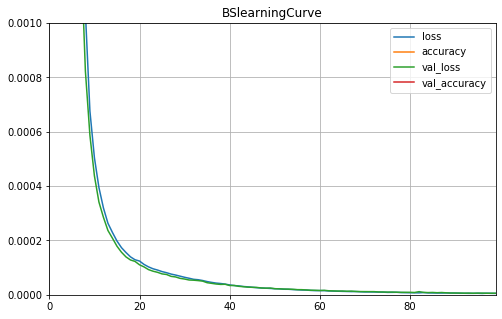

In [50]:
############################################################################################################################
#     fit() method returns a History object containing the training parameters(history.params), the list of epochs it went #
# through(history.epochs), and most importantly a dictionary (history.history), containing the loss and extra metrics it   #
# measured at the end of each epoch on the training set and on the validation set (if any). if  you  use this dictionary   #
# to create a pandas DataFrame and call its plot() method, you get the learning curves                                     #
############################################################################################################################

pd1 = pd.DataFrame(BShistory_vs_NIG.history)
pd1.to_csv('BShistory_vs_NIG.csv')
pd1.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.001) # set the vertical range to [0-1]
plt.title('BSlearningCurve')
plt.show()

In [51]:
################  TRAINING      ####################
################  NIG           ####################

In [27]:
X_train_NIG, X_valid_NIG, y_train_NIG, y_valid_NIG = train_test_split(inputs_NIG, outputs_NIG, test_size = 0.1)

In [38]:
NIGhistory = NIGmodel.fit(X_train_NIG, y_train_NIG, epochs = 100, batch_size = 512, validation_data=(X_valid_NIG, y_valid_NIG))

Epoch 1/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0202 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - 

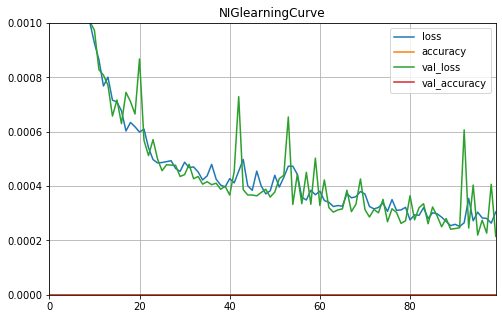

In [49]:
pd2 = pd.DataFrame(NIGhistory.history)
pd2.to_csv('NIGhistory.csv')
pd2.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.001) # set the vertical range to [0-1]
plt.title('NIGlearningCurve')
plt.show()

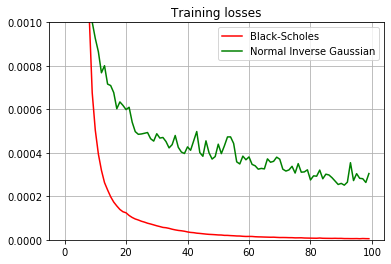

In [52]:
plt.plot((pd1["loss"]), "r", label ='Black-Scholes')
plt.plot((pd2["loss"]), "g", label = "Normal Inverse Gaussian")



plt.grid(True)
plt.gca().set_ylim(0,0.001)
plt.legend(loc = "upper right")
plt.title('Training losses')
plt.show()

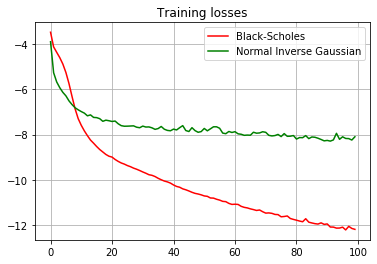

In [53]:
plt.plot(np.log(pd1["loss"]), "r", label ='Black-Scholes')
plt.plot(np.log(pd2["loss"]), "g", label = "Normal Inverse Gaussian")


plt.grid(True)
#plt.gca().set_ylim(0,0.00001)
plt.legend(loc = "upper right")
plt.title('Training losses')
plt.show()

In [129]:
#################################

In [55]:
BSmodel2  = build_model(n_hidden=4, n_neurons=200, learning_rate=3e-4, activationFn = "relu", input_shape=[4])
NIGmodel2 = build_model(n_hidden=4, n_neurons=200, learning_rate=3e-4, activationFn = "relu", input_shape=[7])


In [56]:
BShistory_vs_NIG2 = BSmodel2.fit(X_train_BS, y_train_BS, epochs = 100, batch_size = 512, validation_data=(X_valid_BS, y_valid_BS))

Epoch 1/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0363 - accuracy: 0.0152 - val_loss: 0.0208 - val_accuracy: 0.0221
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0159 - accuracy: 0.0152 - val_loss: 0.0121 - val_accuracy: 0.0221
Epoch 3/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0101 - accuracy: 0.0152 - val_loss: 0.0074 - val_accuracy: 0.0221
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0055 - accuracy: 0.0152 - val_loss: 0.0036 - val_accuracy: 0.0221
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 0.0152 - val_loss: 0.0016 - val_accuracy: 0.0221
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 9.5956e-04 - accuracy: 0.0152 - val_loss: 5.6484e-04 - val_accuracy: 0.0221
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 4.4594e-04 - accuracy: 0.0152 - val_loss: 3.2020e-04 - val_accurac

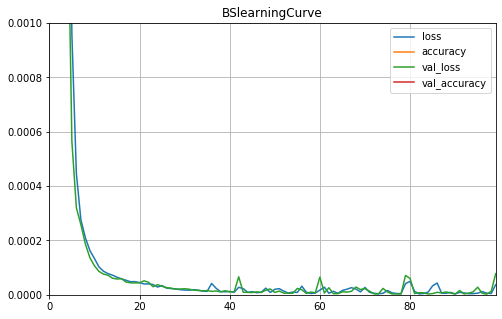

In [62]:
############################################################################################################################
#     fit() method returns a History object containing the training parameters(history.params), the list of epochs it went #
# through(history.epochs), and most importantly a dictionary (history.history), containing the loss and extra metrics it   #
# measured at the end of each epoch on the training set and on the validation set (if any). if  you  use this dictionary   #
# to create a pandas DataFrame and call its plot() method, you get the learning curves                                     #
############################################################################################################################

pd3 = pd.DataFrame(BShistory_vs_NIG2.history)
pd3.to_csv('BShistory_vs_NIG2.csv')
pd3.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.001) # set the vertical range to [0-1]
plt.title('BSlearningCurve')
plt.show()

In [58]:
NIGhistory2 = NIGmodel2.fit(X_train_NIG, y_train_NIG, epochs = 100, batch_size = 512, validation_data=(X_valid_NIG, y_valid_NIG))

Epoch 1/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0252 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 0.0000e

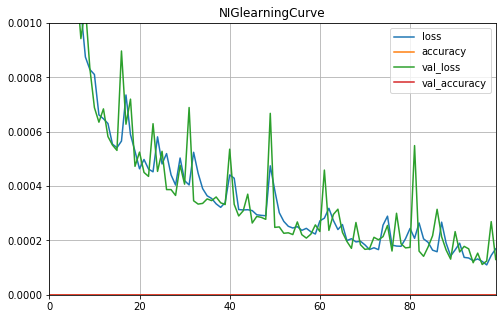

In [60]:
pd4 = pd.DataFrame(NIGhistory2.history)
pd4.to_csv('NIGhistory2.csv')
pd4.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.001) # set the vertical range to [0-1]
plt.title('NIGlearningCurve')
plt.show()

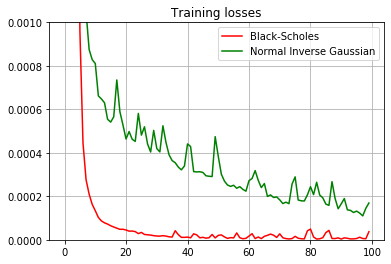

In [63]:
plt.plot((pd3["loss"]), "r", label ='Black-Scholes')
plt.plot((pd4["loss"]), "g", label = "Normal Inverse Gaussian")



plt.grid(True)
plt.gca().set_ylim(0,0.001)
plt.legend(loc = "upper right")
plt.title('Training losses')
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
plt.plot(np.log(pd3["loss"]), "r", label ='Black-Scholes')
plt.plot(np.log(pd4["loss"]), "g", label = "Normal Inverse Gaussian")



plt.grid(True)
plt.gca().set_ylim(0,0.001)
plt.legend(loc = "upper right")
plt.title('Training losses')
plt.show()

NameError: name 'pd3' is not defined